In [88]:
!pip install scikit-learn

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [90]:
df = pd.read_csv("COVID_DATA.csv")

In [91]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328988,ZWE,Africa,Zimbabwe,2023-07-22,265666.0,0.0,0.0,5711.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
328989,ZWE,Africa,Zimbabwe,2023-07-23,265666.0,0.0,0.0,5711.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
328990,ZWE,Africa,Zimbabwe,2023-07-24,265666.0,0.0,0.0,5711.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
328991,ZWE,Africa,Zimbabwe,2023-07-25,265666.0,0.0,0.0,5711.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [92]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.915920e+05,3.199320e+05,3.186730e+05,2.705080e+05,319993.000000,318763.000000,291592.000000,319932.000000,318673.000000,270508.000000,...,188682.000000,124908.000000,225110.000000,302579.000000,247161.000000,3.289930e+05,1.144200e+04,11442.000000,11442.000000,11442.000000
mean,6.212318e+06,1.017964e+04,1.021744e+04,8.333871e+04,92.371336,92.721701,94676.627691,153.864691,154.445017,840.862297,...,32.909876,50.790667,3.097156,73.715348,0.722454,1.282790e+08,4.932416e+04,9.643316,11.915269,1584.379546
std,3.832759e+07,1.137099e+05,9.744265e+04,4.282842e+05,763.900395,599.151264,144877.996736,1199.263098,617.713882,1077.953013,...,13.574319,31.956678,2.548334,7.395978,0.148976,6.602187e+08,1.416802e+05,12.521487,25.690080,1895.369381
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2142.340300
25%,7.417000e+03,0.000000e+00,5.710000e-01,1.250000e+02,0.000000,0.000000,2255.757750,0.000000,0.128000,55.444000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,6.765000e+01,1.030000,-1.467500,44.835101
50%,6.466650e+04,4.000000e+00,3.071400e+01,1.242000e+03,0.000000,0.143000,24277.357000,0.389000,8.429000,357.374000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,5.281300e+03,7.970000,6.060000,1009.522000
75%,6.855705e+05,3.210000e+02,5.687140e+02,1.111600e+04,3.000000,6.000000,121320.002000,42.247250,93.166000,1292.109000,...,41.300000,83.241000,4.200000,79.460000,0.829000,2.830170e+07,3.478480e+04,15.407500,17.100000,2593.319800
max,7.685600e+08,8.401763e+06,6.402721e+06,6.952509e+06,121590.000000,18214.143000,737554.506000,228872.025000,37241.781000,6498.199000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.281224e+06,76.550000,377.430000,10292.468000


In [93]:
df.drop(['new_deaths_smoothed','new_cases_per_million','total_cases_per_million'],axis=1,inplace=True)

In [94]:
df.rename(columns = {'date': 'Date', 'location': 'Country', 'continent':'Continent', 'iso_code':'ISO_code'}, inplace = True)

In [95]:
df

,ISO_code,Continent,Country,Date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328988,ZWE,Africa,Zimbabwe,2023-07-22,265666.0,0.0,0.0,5711.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
328989,ZWE,Africa,Zimbabwe,2023-07-23,265666.0,0.0,0.0,5711.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
328990,ZWE,Africa,Zimbabwe,2023-07-24,265666.0,0.0,0.0,5711.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
328991,ZWE,Africa,Zimbabwe,2023-07-25,265666.0,0.0,0.0,5711.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [96]:
continent_unique = list(df.Continent.unique())
continent_unique

['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America', 'South America']

In [97]:
imputer = SimpleImputer(strategy = "constant")
df2 = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [98]:
df2

,ISO_code,Continent,Country,Date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,missing_value,0.0,missing_value,missing_value,0.0,missing_value,...,missing_value,37.746,0.5,64.83,0.511,41128772.0,missing_value,missing_value,missing_value,missing_value
1,AFG,Asia,Afghanistan,2020-01-04,missing_value,0.0,missing_value,missing_value,0.0,missing_value,...,missing_value,37.746,0.5,64.83,0.511,41128772.0,missing_value,missing_value,missing_value,missing_value
2,AFG,Asia,Afghanistan,2020-01-05,missing_value,0.0,missing_value,missing_value,0.0,missing_value,...,missing_value,37.746,0.5,64.83,0.511,41128772.0,missing_value,missing_value,missing_value,missing_value
3,AFG,Asia,Afghanistan,2020-01-06,missing_value,0.0,missing_value,missing_value,0.0,missing_value,...,missing_value,37.746,0.5,64.83,0.511,41128772.0,missing_value,missing_value,missing_value,missing_value
4,AFG,Asia,Afghanistan,2020-01-07,missing_value,0.0,missing_value,missing_value,0.0,missing_value,...,missing_value,37.746,0.5,64.83,0.511,41128772.0,missing_value,missing_value,missing_value,missing_value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328988,ZWE,Africa,Zimbabwe,2023-07-22,265666.0,0.0,0.0,5711.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,missing_value,missing_value,missing_value,missing_value
328989,ZWE,Africa,Zimbabwe,2023-07-23,265666.0,0.0,0.0,5711.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,missing_value,missing_value,missing_value,missing_value
328990,ZWE,Africa,Zimbabwe,2023-07-24,265666.0,0.0,0.0,5711.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,missing_value,missing_value,missing_value,missing_value
328991,ZWE,Africa,Zimbabwe,2023-07-25,265666.0,0.0,0.0,5711.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,missing_value,missing_value,missing_value,missing_value


In [99]:
df3 = df2.groupby(['Date', 'Country']).agg({
    'total_cases': 'sum',
    'total_deaths': 'sum',
    'total_vaccinations': 'sum'
}).reset_index()


In [100]:
df3['total_cases'].replace({'missing_value' : 0}, inplace = True)
df3['total_deaths'].replace({'missing_value' : 0}, inplace = True)
df3['total_vaccinations'].replace({'missing_value' : 0}, inplace = True)


In [101]:
df3

,Date,Country,total_cases,total_deaths,total_vaccinations
0,2020-01-01,Argentina,0.0,0.0,0.000000e+00
1,2020-01-01,Mexico,0.0,0.0,0.000000e+00
2,2020-01-02,Argentina,0.0,0.0,0.000000e+00
3,2020-01-02,Mexico,0.0,0.0,0.000000e+00
4,2020-01-03,Afghanistan,0.0,0.0,0.000000e+00
...,...,...,...,...,...
328988,2023-07-29,Lower middle income,0.0,0.0,4.930381e+09
328989,2023-07-29,North America,0.0,0.0,1.151511e+09
328990,2023-07-29,South America,0.0,0.0,9.579924e+08
328991,2023-07-29,Uruguay,0.0,0.0,9.030802e+06


In [102]:
df4 = df3[df3['total_deaths']>1000000]
df4

,Date,Country,total_cases,total_deaths,total_vaccinations
63670,2020-09-12,World,28638629.0,1004383.0,0.000000e+00
63922,2020-09-13,World,29105757.0,1010965.0,0.000000e+00
64174,2020-09-14,World,29369974.0,1016181.0,0.000000e+00
64426,2020-09-15,World,29598989.0,1021144.0,0.000000e+00
64678,2020-09-16,World,29843965.0,1025870.0,0.000000e+00
...,...,...,...,...,...
328847,2023-07-26,North America,124405059.0,1602712.0,1.151511e+09
328893,2023-07-26,South America,68788135.0,1355750.0,9.578016e+08
328920,2023-07-26,United States,103436829.0,1127152.0,0.000000e+00
328922,2023-07-26,Upper middle income,244204955.0,2664985.0,5.420687e+09


In [103]:
countries = df4['Country'].unique()

In [104]:
len(countries)

10

In [105]:
con_deaths_gret = list(df4.Country.unique())
con_deaths_gret

['World',
 'High income',
 'Upper middle income',
 'Europe',
 'South America',
 'Asia',
 'North America',
 'Lower middle income',
 'European Union',
 'United States']

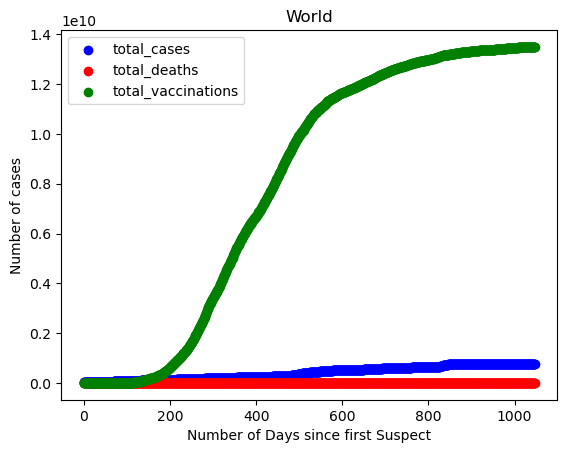

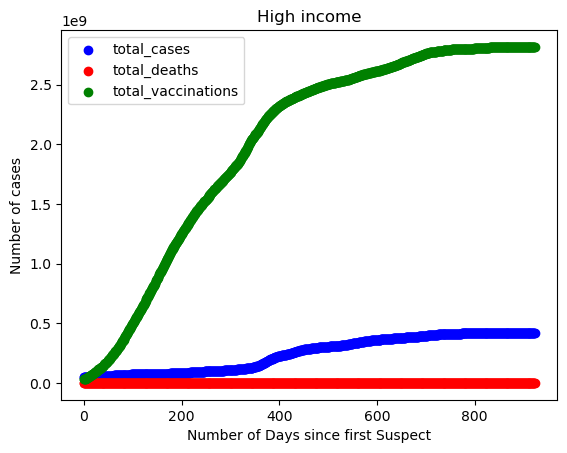

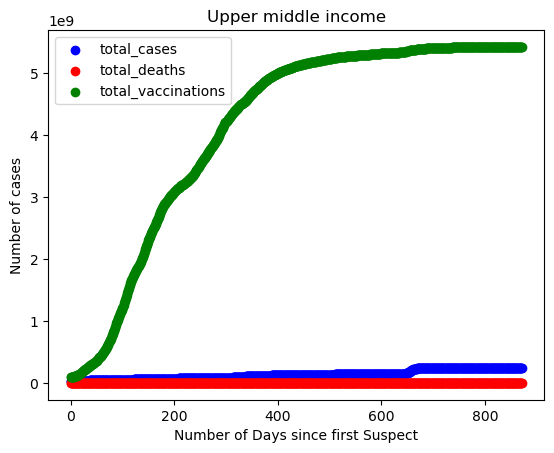

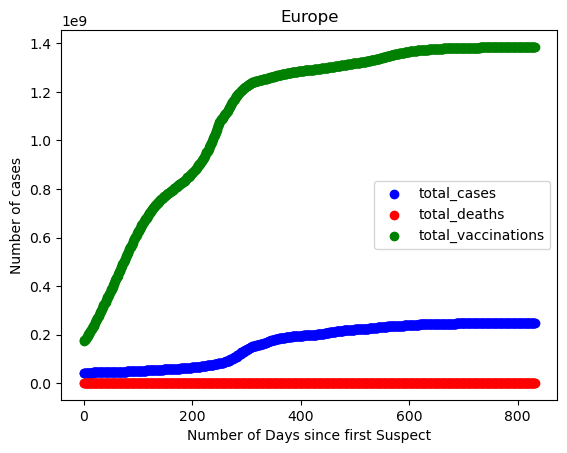

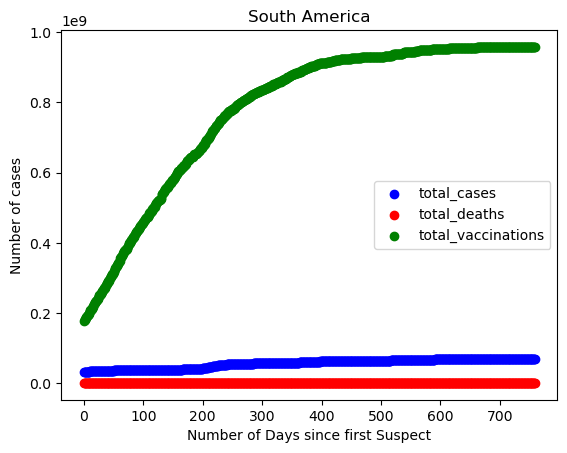

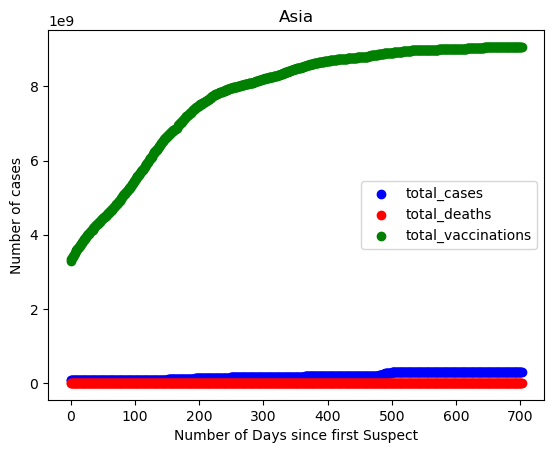

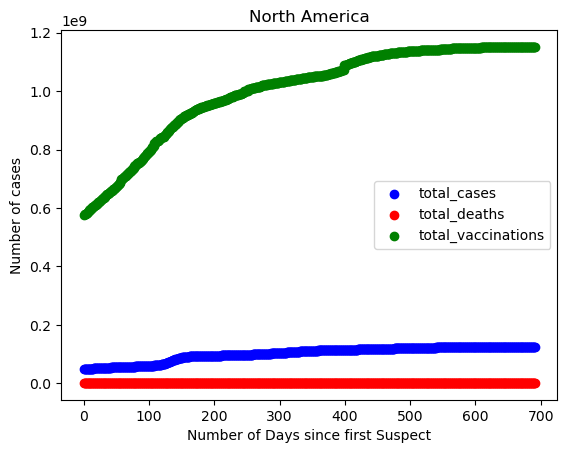

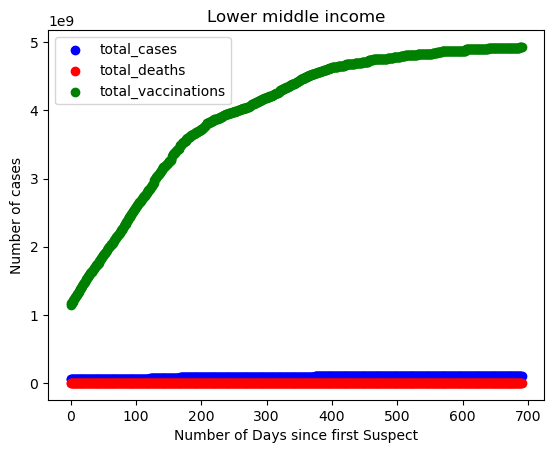

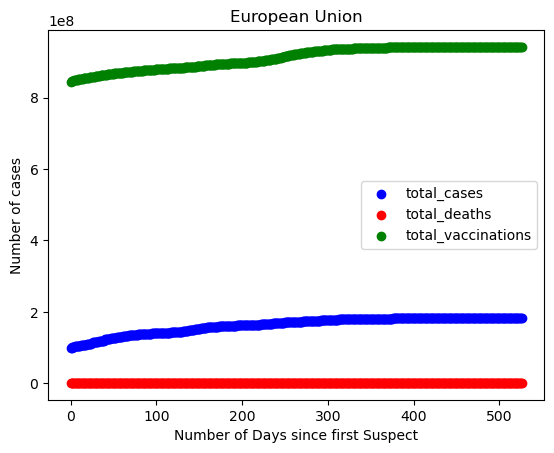

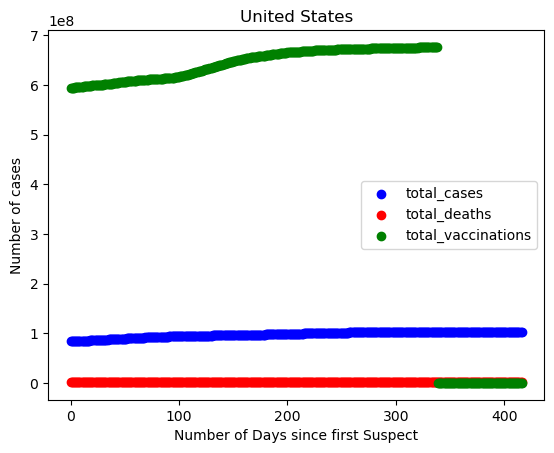

In [106]:
for idx in range(0, len(countries)):
    C = df4[df4['Country'] == countries[idx]].reset_index()
    plt.scatter(np.arange(0,len(C)),C['total_cases'],color="blue",label="total_cases")
    plt.scatter(np.arange(0,len(C)),C['total_deaths'],color="red",label="total_deaths")
    plt.scatter(np.arange(0,len(C)),C['total_vaccinations'],color="green",label="total_vaccinations") 
    plt.title(countries[idx])
    plt.xlabel("Number of Days since first Suspect")
    plt.ylabel("Number of cases")
    plt.legend()
    plt.show()

In [107]:
df5 = df4.groupby(['Country']).agg({
    'total_cases': 'sum',
    'total_deaths': 'sum',
}).reset_index()

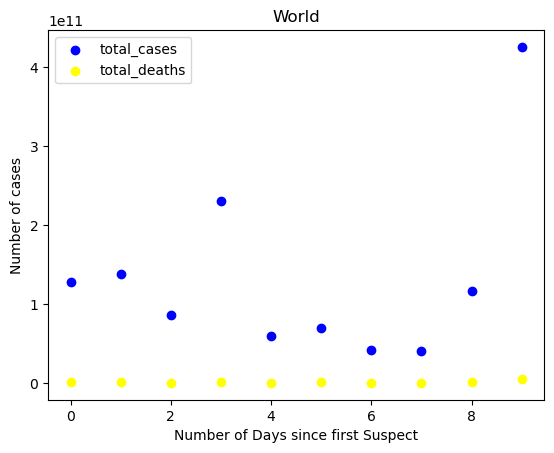

In [108]:
    C = df5
    plt.scatter(np.arange(0,len(C)),C['total_cases'],color="blue",label="total_cases")
    plt.scatter(np.arange(0,len(C)),C['total_deaths'],color="yellow",label="total_deaths") 
    plt.title("World")
    plt.xlabel("Number of Days since first Suspect")
    plt.ylabel("Number of cases")
    plt.legend()
    plt.show()